# How to Query Sources in TPF's using `.get_sources()`

The newly developed funciton `.get_sources()` provides a robust way for querying and identifying sources that are present in or near a Target Pixel File (TPF). 

Users will have the option choosing from three catalogs: __KIC__, __EPIC__ and __Gaia DR2__ from which the funciton will return an `astropy.table` of the corresponding ID, sky coordinates, pixel coordinates, proper motions,corresponging magnitude and an predicted flux of each identified target. 

## Using `.get_sources()` for KIC Sources

Users are able to expand their search for sources with two key arguments: __edge_tolerance__ & __magnitude_limit__. The parameter __dist_tolerance__ is utilized as a distance parameter of how near or far the identified sources should be from the TPF. It's units are in arcsec. Last, __magnitude_limit__ will enable the user to set a limit on the magnitude of stars identified. 

In [84]:
import lightkurve
from lightkurve import KeplerTargetPixelFile

# Load a Target Pixel File 
tpf = KeplerTargetPixelFile.from_archive(2694186, quarter=11)

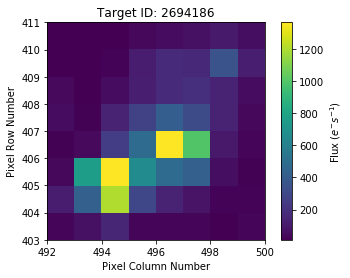

In [85]:
tpf.plot()

Seen in the above figure, it is evident from the TPF that two sources are present. One is the central TPF target: 2694168

`tpf.get_sources()` will indeed confirm what the user can see -- 2 sources. We can also plot the identified stars over the TPF to confirm that indeed these are the sources identified: 

In [86]:
sources = tpf.get_sources()

In [87]:
sources

id,ra,dec,pmra,pmdec,Kpmag,predicted_flux,column,row,epoch
,deg,deg,mas / yr,mas / yr,mag,electron / s,pix,pix,yr
int32,float64,float64,float64,float64,float32,float32,float64,float64,float64
2694186,286.244480,37.928082,0.0,0.0,13.469,44972.7,496.344493591,406.158266443,2011.87422024
2694187,286.244982,37.925112,15.8,0.6,15.775,5377.12,493.956990954,404.869346414,2011.87422024


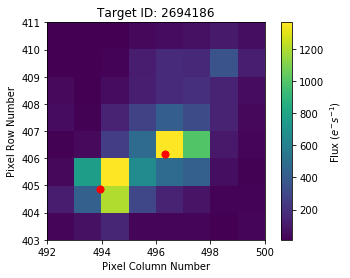

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

tpf.plot()
plt.scatter(sources['column'], sources['row'], marker='o',
            color='red', s=50)

By adjusting the __magnitude limit__, we are also able to query sources with a given range of magnitudes. As expected, when increasing the limit, it is expected for dimmer sources to be identified: 

In [89]:
sources = tpf.get_sources(magnitude_limit=19)

In [90]:
sources

id,ra,dec,pmra,pmdec,Kpmag,predicted_flux,column,row,epoch
,deg,deg,mas / yr,mas / yr,mag,electron / s,pix,pix,yr
int32,float64,float64,float64,float64,float32,float32,float64,float64,float64
2694186,286.244480,37.928082,0.0,0.0,13.469,44972.7,496.344493591,406.158266443,2011.87422024
2694187,286.244982,37.925112,15.8,0.6,15.775,5377.12,493.956990954,404.869346414,2011.87422024
2694192,286.246657,37.931781,-4.0,-6.0,18.083,641.725,498.14142319,409.385682579,2011.87422024
2694202,286.248570,37.929615,0.0,0.0,18.981,280.64,495.750453385,409.341111379,2011.87422024


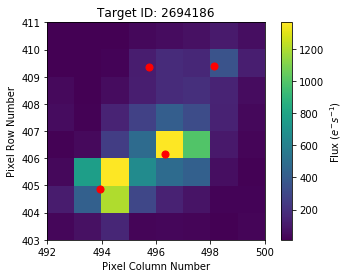

In [91]:
tpf.plot()
plt.scatter(sources['column'], sources['row'], marker='o',
            color='red', s=50, lw=1)

Another useful case is looking at cases where sources may fall outside the TPF yet their Point Spread Functions are contaminating the source. Seen here, in the bottom left, there's an evident source:

In [92]:
# Load AGN source that has a source outside the TPF 
tpf = KeplerTargetPixelFile.from_archive(10402746, quarter=11)

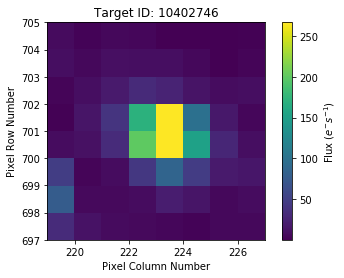

In [93]:
tpf.plot()

Utilizing __edge_tolerance__ enables the user to query sources that fall close to the TPF boundaries. In this demonstrated case, we show that the 3 pixel default __edge_tolerance__ is able to identify a source close to the TPF boundaries

In [94]:
sources = tpf.get_sources()

In [95]:
sources

id,ra,dec,pmra,pmdec,Kpmag,predicted_flux,column,row,epoch
,deg,deg,mas / yr,mas / yr,mag,electron / s,pix,pix,yr
int32,float64,float64,float64,float64,float32,float32,float64,float64,float64
10402726,291.022980,47.556210,0.0,0.0,15.276,8514.31,216.989107843,698.419962039,2011.87422197
10402746,291.029330,47.561527,0.0,0.0,16.277,3386.48,222.857113779,700.37663141,2011.87422197


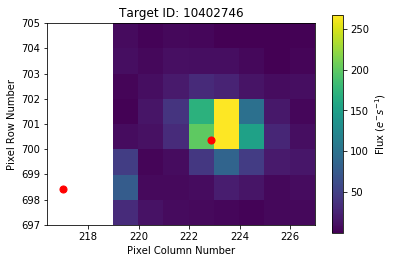

In [96]:
tpf.plot()
plt.scatter(sources['column'], sources['row'], marker='o',
            color='red', s=50)

## Using `.get_sources()` for EPIC & Gaia DR2 Sources

Although the function will automatically query from the catalog determined by the assigned mission on the TPF, users are also able to query from __EPIC__ and __Gaia DR2__. Here we will briefely demonstrate: 

In [97]:
sources = tpf.get_sources(catalog='Gaia2', magnitude_limit=20)

In [98]:
sources

id,ra,dec,pmra,pmdec,Gmag,predicted_flux,column,row,epoch
,deg,deg,mas / yr,mas / yr,mag,electron / s,pix,pix,yr
str28,float64,float64,float64,float64,float64,float64,float64,float64,float64
Gaia DR2 2129188156772425472,291.02940424574,47.56146311628,--,--,19.6208,155.678718616,222.864051539,700.303462476,2011.87422197
Gaia DR2 2129188122412687744,291.02299123354,47.55621278895,2.003,4.726,15.2453,8758.49019826,216.996251341,698.418380909,2011.87422197


It is important to note that while __EPIC__, __KIC__ and __Gaia__ are in optical bands, __Gaia__ sources are identified with a G band magnitude, while __EPIC__ and __KIC__ are identified with Kp magnitude. Hence, there will be a systematic difference between how bright sources are when querying from each catalog.

When querying with Gaia DR2, the user must also be aware by the Epoch of coordinates provided by Gaia DR2 (JD 2015.5) and its capable seperation of sources. Depending on each case, Gaia will return more sources that are perhaps not separated by the resolution of Keper.

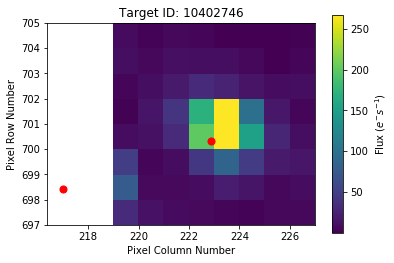

In [99]:
tpf.plot()
plt.scatter(sources['column'], sources['row'], marker='o',
            color='red', s=50, lw=1)

In [100]:
# Load a TPF of a M dwarf from EPIC 
tpf = KeplerTargetPixelFile.from_archive(229227260)

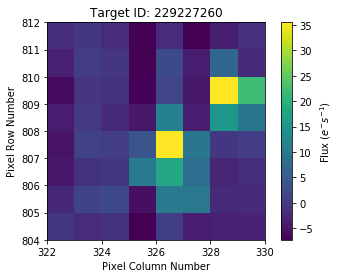

In [101]:
tpf.plot()

In some cases, it is crucial for the user the aid of multiple catalogs to identify all sources. In the above TPF, the EPIC source has evidently two sources. When overplotting the identified sources, somes cases will lead in overlaping dim and bright sources. It may come to a suprise to the user that the other source (on the top right) is not queried from our function `.get_sources()`. 

In such cases, users are reccomended to utilize __Gaia__

In [102]:
sources = tpf.get_sources(catalog='EPIC', magnitude_limit=20, edge_tolerance=12)

In [103]:
sources

id,ra,dec,pmra,pmdec,Kpmag,predicted_flux,column,row,epoch
,deg,deg,mas / yr,mas / yr,mag,electron / s,pix,pix,yr
int32,float64,float64,float64,float64,float32,float32,float64,float64,float64
212300488,206.109451,-17.516954,--,--,16.931,1854.17,326.796692263,806.774845823,2015.63954272
229227260,206.108750,-17.517012,--,--,19.330,203.493,326.20148305,806.647430703,2015.63954272


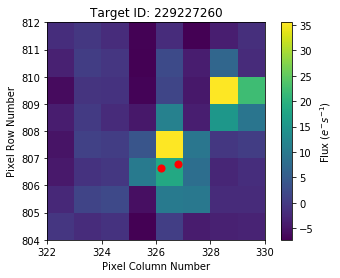

In [104]:
tpf.plot()
plt.scatter(sources['column'], sources['row'], marker='o',
            color='red', s=50, lw=1)

In [105]:
sources = tpf.get_sources(catalog='Gaia2', magnitude_limit=20, edge_tolerance=12)

In [106]:
sources

id,ra,dec,pmra,pmdec,Gmag,predicted_flux,column,row,epoch
,deg,deg,mas / yr,mas / yr,mag,electron / s,pix,pix,yr
str28,float64,float64,float64,float64,float64,float64,float64,float64,float64
Gaia DR2 6295000907092440064,206.10844172971,-17.51705074700,-201.152,-10.728,19.5020,173.679775184,325.941221161,806.579506935,2015.63954272
Gaia DR2 6295000902797700352,206.11131100221,-17.51517509453,-1.980,-3.455,19.6365,153.443765771,328.193667179,808.57227665,2015.63954272


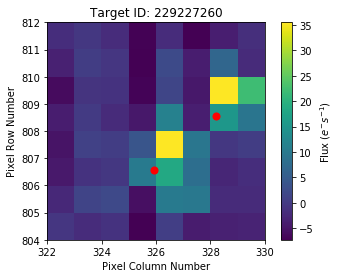

In [108]:
tpf.plot()
plt.scatter(sources['column'], sources['row'], marker='o',
            color='red', s=50)